In [1]:
import os, torch

In [2]:
max_frame = 12 * 30 # 12s * 30 fps
frame_skip = 5
frame_size = 256
parted = True
print("Total frames:", max_frame / frame_skip)

Total frames: 72.0


In [3]:
import cv2

def load_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise IOError(f"Cannot open video {video_path}")

    frames = []
    while True:
        ret, frame = cap.read()
        
        # Ensure that it is in RGB and resize to frame_sizexframe_size
        if ret:
            # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, (frame_size, frame_size))
        else:
            break

        frames.append(frame)

    cap.release()
    return frames

def load_video_tensor(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise IOError(f"Cannot open video {video_path}")

    frames = []
    while True:
        ret, frame = cap.read()
        
        # Ensure that it is in RGB and resize to frame_sizexframe_size
        if ret:
            # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, (frame_size, frame_size))
        else:
            break
        
        frame_tensor = torch.tensor(frame, dtype=torch.uint8)
        frames.append(frame_tensor)

    cap.release()
    frames = torch.stack(frames)
    return frames

In [4]:
tensor = False
input_folder = "../data_full_backup"
output_folder = f"data_frameskip_{frame_skip}_{max_frame//30}s{'_tensor' if tensor else ''}{'' if parted else '_unparted'}_{frame_size}size"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
else:
    if os.listdir(output_folder):
        print(f"Output folder {output_folder} is not empty. Continue? (y/n)")
        if input().lower() != 'y':
            exit()
os.listdir(input_folder)

['Efficiency - Always pulls out of field_5',
 'Efficiency - Does not pull needle out of field_1',
 'Efficiency - Grasps once only_5',
 'Efficiency - Many wasted moves_1',
 'Efficiency - No wasted moves_5',
 'Efficiency - Regrasps multiple times_1',
 'Efficiency - Regrasps occasionally_3',
 'Efficiency - Some wasted moves_3',
 'Efficiency - Sometimes pulls needle out of field_3',
 'Handling - A few passes_3',
 'Handling - Always bolsters_5',
 'Handling - Always pull needle out on the curve_5',
 'Handling - Does not bolster_1',
 'Handling - Grasps tip of needle_1',
 'Handling - Multiple passes_1',
 'Handling - Never grasps the tip_5',
 'Handling - Pulls needle out not on the curve_1',
 'Handling - Single passes_5',
 'Handling - Sometimes bolsters_3',
 'Handling - Sometimes grasps the tip_3',
 'Handling - Sometimes pulls needle out on the curve_3',
 'Preparation - Approximating clamp applied correctly_5',
 'Preparation - Background in place_5',
 'Preparation - Clean adventitial stripping_

In [5]:
from concurrent.futures import ThreadPoolExecutor

metadata = []

def task(microsurgery_class, sub_microsurgery_class, video_name_file):
    frames = load_video(f"{input_folder}/"+microsurgery_class+"/"+sub_microsurgery_class+"/"+video_name_file)
    metadata.append({
        "path": f"{output_folder}/"+microsurgery_class+"/"+sub_microsurgery_class+"/"+video_name_file,
        "frames": len(frames)
    })
    
    if os.path.exists(f"{output_folder}/"+microsurgery_class) == False:
        os.mkdir(f"{output_folder}/"+microsurgery_class)

    if os.path.exists(f"{output_folder}/"+microsurgery_class+"/"+sub_microsurgery_class) == False:
        os.mkdir(f"{output_folder}/"+microsurgery_class+"/"+sub_microsurgery_class)

    total_parts = len(frames) // max_frame
    # total_parts = 1
    for index, part in enumerate(range(1, total_parts+1)):
        if os.path.exists(f"{output_folder}/"+microsurgery_class+"/"+sub_microsurgery_class+"/"+video_name_file+"_"+str(part)) == False:
            os.mkdir(f"{output_folder}/"+microsurgery_class+"/"+sub_microsurgery_class+"/"+video_name_file+"_"+str(part))

        for index, frame in enumerate(frames[index * max_frame: max_frame * part: frame_skip]):
            cv2.imwrite(f"{output_folder}/"+microsurgery_class+"/"+sub_microsurgery_class+"/"+video_name_file+"_"+str(part)+"/image_"+str(index)+".jpg", frame)


def no_subclass(microsurgery_class, video_name_file):
    frames = load_video(f"{input_folder}/"+microsurgery_class+"/"+video_name_file)
    metadata.append({
        "path": f"{output_folder}/"+microsurgery_class+"/"+video_name_file,
        "frames": len(frames)
    })
    if os.path.exists(f"{output_folder}/"+microsurgery_class) == False:
        os.mkdir(f"{output_folder}/"+microsurgery_class)

    total_parts = len(frames) // max_frame
    # total_parts = 1
    for index, part in enumerate(range(1, total_parts+1)):
        if os.path.exists(f"{output_folder}/"+microsurgery_class+"/"+video_name_file+"_"+str(part)) == False:
            os.mkdir(f"{output_folder}/"+microsurgery_class+"/"+video_name_file+"_"+str(part))

        for index, frame in enumerate(frames[index * max_frame: max_frame * part: frame_skip]):
            cv2.imwrite(f"{output_folder}/"+microsurgery_class+"/"+video_name_file+"_"+str(part)+"/image_"+str(index)+".jpg", frame)

def no_subclass_no_parting(microsurgery_class, video_name_file):
    frames = load_video(f"{input_folder}/"+microsurgery_class+"/"+video_name_file)
    metadata.append({
        "path": f"{output_folder}/"+microsurgery_class+"/"+video_name_file,
        "frames": len(frames)
    })
    if os.path.exists(f"{output_folder}/"+microsurgery_class) == False:
        os.mkdir(f"{output_folder}/"+microsurgery_class)

    total_parts = len(frames) // max_frame
    # total_parts = 1
    for index, part in enumerate(range(1, total_parts+1)):
        if os.path.exists(f"{output_folder}/"+microsurgery_class+"/"+video_name_file) == False:
            os.mkdir(f"{output_folder}/"+microsurgery_class+"/"+video_name_file)

        for idx, frame in enumerate(frames[index * max_frame: max_frame * part: frame_skip], start=max_frame * (part-1) // frame_skip):
            cv2.imwrite(f"{output_folder}/"+microsurgery_class+"/"+video_name_file+"/image_"+str(idx)+".jpg", frame)


def as_tensor(microsurgery_class, video_name_file):
    frames = load_video_tensor(f"{input_folder}/"+microsurgery_class+"/"+video_name_file)
    if os.path.exists(f"{output_folder}/"+microsurgery_class) == False:
        os.mkdir(f"{output_folder}/"+microsurgery_class)

    total_parts = len(frames) // max_frame
    if total_parts == 0:
        total_parts = 1
    # total_parts = 1
    for index, part in enumerate(range(1, total_parts+1)):
        torch.save(frames[index * max_frame: max_frame * part: frame_skip], f"{output_folder}/"+microsurgery_class+"/"+video_name_file+"_"+str(part)+".pt")

In [6]:

# job_list = []
# with ThreadPoolExecutor(10) as executor:
#     for microsurgery_class in os.listdir(f"{input_folder}"):
#         print(microsurgery_class)
#         for sub_microsurgery_class in os.listdir(f"{input_folder}/"+microsurgery_class):
#             for video_name_file in os.listdir(f"{input_folder}/"+microsurgery_class+"/"+sub_microsurgery_class):
#                 job = executor.submit(task, microsurgery_class, sub_microsurgery_class, video_name_file)

#                 job_list.append(job)

from tqdm import tqdm

job_list = []
with ThreadPoolExecutor() as executor:
    for microsurgery_class in os.listdir(f"{input_folder}"):
        print(microsurgery_class)
        for video_name_file in os.listdir(f"{input_folder}/"+microsurgery_class):
            if tensor:
                job = executor.submit(as_tensor, microsurgery_class, video_name_file)
            else: 
                if parted:
                    job = executor.submit(no_subclass, microsurgery_class, video_name_file)
                else:
                    job = executor.submit(no_subclass_no_parting, microsurgery_class, video_name_file)
            job_list.append(job)


for job in tqdm(job_list):
    job.result() 

Efficiency - Always pulls out of field_5
Efficiency - Does not pull needle out of field_1
Efficiency - Grasps once only_5
Efficiency - Many wasted moves_1
Efficiency - No wasted moves_5
Efficiency - Regrasps multiple times_1
Efficiency - Regrasps occasionally_3
Efficiency - Some wasted moves_3
Efficiency - Sometimes pulls needle out of field_3
Handling - A few passes_3
Handling - Always bolsters_5
Handling - Always pull needle out on the curve_5
Handling - Does not bolster_1
Handling - Grasps tip of needle_1
Handling - Multiple passes_1
Handling - Never grasps the tip_5
Handling - Pulls needle out not on the curve_1
Handling - Single passes_5
Handling - Sometimes bolsters_3
Handling - Sometimes grasps the tip_3
Handling - Sometimes pulls needle out on the curve_3
Preparation - Approximating clamp applied correctly_5
Preparation - Background in place_5
Preparation - Clean adventitial stripping_5
Preparation - Ends set up poorly in approximating clamp_1
Preparation - Excessive inadequate

100%|██████████| 375/375 [00:00<00:00, 374759.11it/s]


In [7]:
import pandas as pd

df = pd.DataFrame(metadata)
df

,path,frames
0,data_frameskip_5_12s_256size/Efficiency - Alwa...,243
1,data_frameskip_5_12s_256size/Efficiency - Does...,243
2,data_frameskip_5_12s_256size/Efficiency - Alwa...,252
3,data_frameskip_5_12s_256size/Efficiency - Does...,327
4,data_frameskip_5_12s_256size/Efficiency - Does...,371
...,...,...
370,data_frameskip_5_12s_256size/Preparation - For...,7680
371,data_frameskip_5_12s_256size/Quality of Knot -...,2545
372,data_frameskip_5_12s_256size/Quality of Knot -...,3702
373,data_frameskip_5_12s_256size/Quality of Knot -...,2766


In [8]:
# df.to_csv(f"{output_folder}/metadata.csv", index=False)

In [9]:
import matplotlib
df[df["frames"] > 20 * 30].count()

path      254
frames    254
dtype: int64

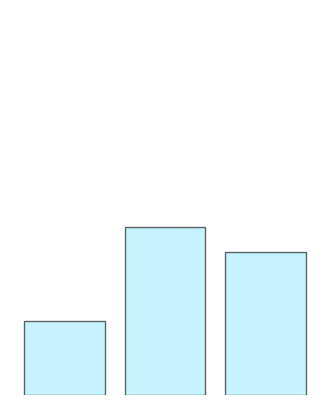

In [325]:
import matplotlib.pyplot as plt
import numpy as np

# Define the blue color variant based on the provided code 'A0ECFF'
blue_color = '#A0ECFF'

# Generate 6 additional random softmax probabilities for the example
probabilities_list = []
for _ in range(1):
    class_1 = np.random.rand(1)
    class_2 = np.random.rand(1)
    class_3 = np.random.rand(1)

    # Applying softmax function to get probabilities
    probabilities = np.exp([class_1, class_2, class_3]) / np.sum(np.exp([class_1, class_2, class_3]))
    probabilities_list.append(probabilities.flatten())

# Create the figure
fig, ax = plt.subplots(figsize=(4, 5))

# Plot each set of probabilities
for i, probabilities in enumerate(probabilities_list):
    
    ax.bar(['Class 1', 'Class 2', 'Class 3'], probabilities, color=blue_color, edgecolor='black', alpha=0.6, label=f'Sample {i+1}')

# Remove grid and title
ax.grid(False)
ax.set_ylim(0, 1)
ax.set_title('')
ax.axis('off')
# ax.set_xticklabels([])
# ax.set_yticklabels([])

# Show only the probability ticks
ax.set_ylabel('')

# Show the plot
plt.show()